# Performance Measurement of Models¶
Evaluation of a Classification Model
Once our model is completed, it is necessary to evaluate its performance; either it is a Classification or Regression model. So for evaluating a Classification model, we have the following ways:

# Log Loss or Cross-Entropy Loss:
It is used for evaluating the performance of a classifier, whose output is a probability value between the 0 and 1.
For a good binary Classification model, the value of log loss should be near to 0.
The value of log loss increases if the predicted value deviates from the actual value.
The lower log loss represents the higher accuracy of the model.
For Binary classification, Log-loss can be calculated as:$$Log-loss =  - \frac{1}{N} \sum_{i=1}^N [y_{i} \log \, p_{i} + (1 - y_{i}) \log \, (1 - p_{i})].$$

# Confusion Matrix:
The confusion matrix provides us a matrix/table as output and describes the performance of the model. It is also known as the Error Matrix. The matrix consists of predictions result in a summarized form, which has a total number of correct predictions and incorrect predictions.The matrix looks like as below table:



# Where the terms have the meaning:

True Positive(TP): A result that was predicted as positive by the classification model and also is positive.

True Negative(TN): A result that was predicted as negative by the classification model and also is negative.

False Positive(FP): A result that was predicted as positive by the classification model but actually is negative.

False Negative(FN): A result that was predicted as negative by the classification model but actually is positive.
# Accuracy
The mathematical formula is :

$$Accuracy  =  \dfrac{Number\hspace{0.2cm}of\hspace{0.2cm}Correctly\hspace{0.2cm}Classified\hspace{0.2cm}Points}{Total\hspace{0.2cm}Number\hspace{0.1cm}ofPoints} = \frac{(TP+TN)}{(TP+TN+FP+FN)}$$
$0\leq Accuracy \leq 1$

# Load Libraries

In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style='white', color_codes=True)

# Data Acquisiton

In [3]:
data = pd.read_csv("iris.csv")

In [4]:
# Showing overview of the dataset
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
#Printing Dimension of datasets
print("Dimension of dataset:", data.shape)

Dimension of dataset: (150, 5)


In [6]:
# Showing datatypes of the columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
# getting discriptive statistcs 
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Preprocessing

In [8]:
#Identifing missing Values
miss_val = data.isna().sum()
miss_val

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [9]:
# Extracting dataframe for only 'Object' datatypes
data_ct = data.select_dtypes(include='object')
data_ct.head()

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa


In [10]:
# Extracting dataframe for only 'number' datatypes
data_num = data.select_dtypes(include=['float64','int64'])
data_num.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [11]:
data.species.value_counts()

virginica     50
setosa        50
versicolor    50
Name: species, dtype: int64

Text(0.5, 1.0, 'Species distribution')

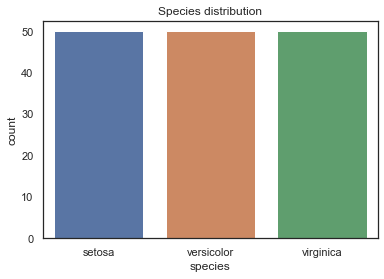

In [12]:
#Count plot for Species
sns.countplot('species',data = data)
plt.title("Species distribution")

# Converting the species labels into numeric

In [13]:
# Import label encoder 
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
data['species']= label_encoder.fit_transform(data['species'])

In [14]:
#Check unique value of species
data['species'].unique()

array([0, 1, 2])

In [15]:
# Showing overview of the dataset
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [16]:
#Constructing correlation Matrix
corr = data.corr()
corr

,sepal_length,sepal_width,petal_length,petal_width,species
sepal_length,1.000000,-0.109369,0.871754,0.817954,0.782561
sepal_width,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
petal_length,0.871754,-0.420516,1.000000,0.962757,0.949043
petal_width,0.817954,-0.356544,0.962757,1.000000,0.956464
species,0.782561,-0.419446,0.949043,0.956464,1.000000


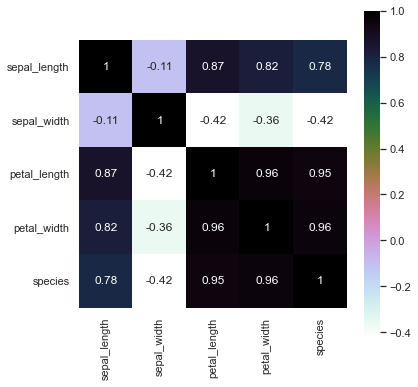

In [17]:
#heatmap 
plt.figure(figsize=(6,6))
sns.heatmap(corr, annot=True, cmap='cubehelix_r',square=True) 
plt.show()

In [18]:
# Absolute correlation value with species(Target variable)

abs(corr['species'])[:-1].sort_values(ascending = False)

petal_width     0.956464
petal_length    0.949043
sepal_length    0.782561
sepal_width     0.419446
Name: species, dtype: float64

In [19]:
# Splitting Data set into train and validation

from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=0.30)

In [20]:
#considering only highly correlated features for training and validation
train_x = train.drop(['species'], axis = 1)
train_y = train['species']             

test_x = test.drop(['species'],axis = 1)
test_y = test['species']

In [21]:
print('Dimension of train_x :',train_x.shape)
print('Dimension of train_y :',train_y.shape)
print('Dimension of test_x :',test_x.shape)
print('Dimension of test_y :',test_y.shape)

Dimension of train_x : (105, 4)
Dimension of train_y : (105,)
Dimension of test_x : (45, 4)
Dimension of test_y : (45,)


# Python Implementation of Decision Tree Classifier

In [22]:
#Using Decision Tree Classifier for model building

from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0,max_depth=3)
clf.fit(train_x, train_y)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [23]:
# Predict Species for test data
pred = clf.predict(test_x)
pred

array([1, 2, 2, 0, 0, 1, 1, 1, 0, 2, 1, 0, 1, 2, 0, 2, 1, 1, 0, 1, 1, 2,
       2, 1, 0, 1, 1, 1, 0, 1, 0, 1, 2, 1, 2, 0, 1, 0, 2, 1, 0, 1, 1, 2,
       1])

In [24]:
#validation of built model
from sklearn.metrics import accuracy_score

print('The accuracy of the Decision Tree is {}%'.format(round(accuracy_score(pred,test_y)*100,2)))

The accuracy of the Decision Tree is 93.33%


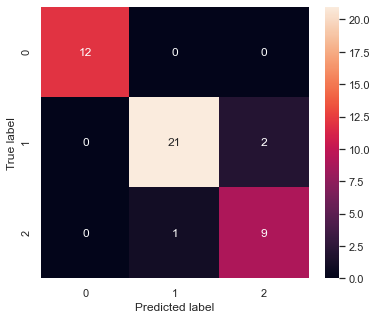

In [25]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(test_y, pred) 

plt.figure(figsize=(6,5))
sns.heatmap(conf_mat, annot=True)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [26]:
# Python script for confusion matrix creation. 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

print ('Confusion Matrix :')
print(conf_mat) 
print ("*"*50)
print ('Report :' )
print (classification_report(test_y, pred)) 
print ("*"*50)

Confusion Matrix :
[[12  0  0]
 [ 0 21  2]
 [ 0  1  9]]
**************************************************
Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.95      0.91      0.93        23
           2       0.82      0.90      0.86        10

    accuracy                           0.93        45
   macro avg       0.92      0.94      0.93        45
weighted avg       0.94      0.93      0.93        45

**************************************************


In [27]:
#log_loss
from sklearn.metrics import log_loss
pred_prob = clf.predict_proba(test_x)
logloss = log_loss(test_y,pred_prob)
print('log-loss:', round(logloss,3))

log-loss: 2.303


# Evaluation of a Regression Model¶
## ####Mean Squared Error or MSE
MSE is defined as the average of the square of the difference between the original and predicted values of the data.

The mathematical formula is:$$ MSE = \frac{1}{n} \sum_{i=1}^n (y_i - \hat y_i)^2 $$

# Root Mean Squared Error or RMSE
RMSE is defined as the square root of average of the square of the difference between the original and predicted values of the data.

The mathematical formula is:$$ RMSE = \sqrt {\frac{1}{n} \sum_{i=1}^n (y_i - \hat y_i)^2} $$

Mean Absolute Error or MAE
MAE is defined as the average of the absolute difference between the original and predicted values of the data.

The mathematical formula is:$$ MAE = \frac{1}{n} \sum_{i=1}^n \mid {y_i - \hat y_i} \mid $$

# Mean absolute percentage error (MAPE)
The mean absolute percentage error (MAPE) is a statistical measure of how accurate a forecast system is. It measures this accuracy as a percentage, and can be calculated as the average absolute percent error for each time period minus actual values divided by actual values.

The mathematical formula is:$$ MAPE =  \frac{1}{n} \sum_{i=1}^n \mid { \frac {y_i - \hat y_i}{y_i}} \mid  * 100 $$

R-squared (coefficient of determination)
R-Squared is a statistical measure of fit that indicates how much variation of a dependent variable is explained by the independent variable(s) in a regression model. It also a measure of how well the model minimizes error compared with just utilizing the mean as an estimate. In some extreme cases, R-squared can have a value less than zero also, which means the predicted values from the model perform worse than just taking the simple mean as a prediction for all the observations.

The mathematical formula is:$$ R^2 = 1 - \frac{SS_{res}}{SS_{total}} $$

Where $ \hspace{0.5cm} \bar y = \frac{1}{n} \sum_{i=1}^n y_i \hspace{0.5cm}; 
\hspace{0.5cm} SS_{total} = \sum_{i} (y_i - \bar y)^2 \hspace{0.5cm} ;
\hspace{0.5cm}SS_{res} = \sum_{i} (y_i - \hat y_i)^2 = \sum_i e_i^2 \hspace{0.5cm} $

# Adjusted R-Squared
The mathematical formula is:

$$ R^2_{adj} = 1 - \frac{(1 - R^2) (N - 1)}{N-p-1} $$
Where

$R^2$ = Sample R-square ; $\hspace{0.5cm}$ p = Number of predictors ; $\hspace{0.5cm}$N = Total sample size
Difference between R-squared and Adjusted R-squared
Every time you add a independent variable to a model, the R-squared increases, even if the independent variable is insignificant. It never declines. Whereas Adjusted R-squared increases only when independent variable is significant and affects dependent variable.

Adjusted r-squared can be negative when r-squared is close to zero.

Adjusted r-squared value always be less than or equal to r-squared value.

In [28]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
data = pd.concat([train,test],ignore_index = True)

In [29]:
#Printing Dimension of datasets
print("Dimension of train dataset", train.shape)
print("Dimension of test dataset", test.shape)
print("Dimension of data dataset", data.shape)

Dimension of train dataset (1460, 81)
Dimension of test dataset (1459, 80)
Dimension of data dataset (2919, 81)


In [30]:
# Showing overview of the Final dataset
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [31]:
# Extracting dataframe for only 'number' datatypes
df = data.select_dtypes(include=['float64','int64'])
df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706.0,...,0,61,0,0,0,0,0,2,2008,208500.0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978.0,...,298,0,0,0,0,0,0,5,2007,181500.0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486.0,...,0,42,0,0,0,0,0,9,2008,223500.0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216.0,...,0,35,272,0,0,0,0,2,2006,140000.0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655.0,...,192,84,0,0,0,0,0,12,2008,250000.0


In [32]:
# Showing datatypes of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   LotFrontage    2433 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   OverallQual    2919 non-null   int64  
 5   OverallCond    2919 non-null   int64  
 6   YearBuilt      2919 non-null   int64  
 7   YearRemodAdd   2919 non-null   int64  
 8   MasVnrArea     2896 non-null   float64
 9   BsmtFinSF1     2918 non-null   float64
 10  BsmtFinSF2     2918 non-null   float64
 11  BsmtUnfSF      2918 non-null   float64
 12  TotalBsmtSF    2918 non-null   float64
 13  1stFlrSF       2919 non-null   int64  
 14  2ndFlrSF       2919 non-null   int64  
 15  LowQualFinSF   2919 non-null   int64  
 16  GrLivArea      2919 non-null   int64  
 17  BsmtFullBath   2917 non-null   float64
 18  BsmtHalf

In [33]:

# getting discriptive statistcs on "number" datatypes
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2919.000000,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000
mean,1460.000000,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,...,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,180921.195890
std,842.787043,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,...,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,730.500000,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129975.000000
50%,1460.000000,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,...,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,2189.500000,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [34]:

#Identifing missing Values
miss_val = df.isna().sum()
miss_val

Id                  0
MSSubClass          0
LotFrontage       486
LotArea             0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
MasVnrArea         23
BsmtFinSF1          1
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea           0
BsmtFullBath        2
BsmtHalfBath        2
FullBath            0
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
TotRmsAbvGrd        0
Fireplaces          0
GarageYrBlt       159
GarageCars          1
GarageArea          1
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
MiscVal             0
MoSold              0
YrSold              0
SalePrice        1459
dtype: int64

In [55]:
df.shape


(2919, 38)

In [35]:
# Identifing missing Values > 0 and sorting them by ascending order
miss_val[miss_val>0].sort_values(ascending = False)

SalePrice       1459
LotFrontage      486
GarageYrBlt      159
MasVnrArea        23
BsmtFullBath       2
BsmtHalfBath       2
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
GarageCars         1
GarageArea         1
dtype: int64

In [36]:
columns = ['LotFrontage','GarageYrBlt','MasVnrArea','BsmtHalfBath','BsmtFullBath','GarageArea','GarageCars','TotalBsmtSF',\
                'BsmtUnfSF','BsmtFinSF2','BsmtFinSF1']
for column in columns:
    df[column] = df[column].fillna(df[column].mean())

In [37]:
#Spliting dataframe into train and test by manually as intially we have two dataframes train and test.
df_train = df[:1460]
df_test = df[1460:]

In [38]:
#Constructing correlation Matrix
data_corr = df_train.corr()
data_corr

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.009828,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050212,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.356828,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022905,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.009828,-0.356828,1.000000,0.305194,0.234641,-0.053148,0.116955,0.083176,0.179112,0.214800,...,0.076000,0.137147,0.010143,0.062061,0.037665,0.180839,0.000159,0.010366,0.006494,0.334820
LotArea,-0.033226,-0.139781,0.305194,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103952,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.234641,0.105806,1.000000,-0.091932,0.572323,0.550684,0.410200,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.053148,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.127760,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.116955,0.014228,0.572323,-0.375983,1.000000,0.592855,0.314704,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.083176,0.013788,0.550684,0.073741,0.592855,1.000000,0.179151,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050212,0.022905,0.179112,0.103952,0.410200,-0.127760,0.314704,0.179151,1.000000,0.263552,...,0.159361,0.124932,-0.109851,0.018800,0.061465,0.011726,-0.029811,-0.005951,-0.008186,0.475210
BsmtFinSF1,-0.005024,-0.069836,0.214800,0.214103,0.239666,-0.046231,0.249503,0.128451,0.263552,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


In [39]:
#considering only the features which have absolute correlation value greater tha 0.60

data_corr = data_corr['SalePrice'][:-1]
data_corr[abs(data_corr)>=0.60].sort_values(ascending=False)

OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
TotalBsmtSF    0.613581
1stFlrSF       0.605852
Name: SalePrice, dtype: float64

In [40]:
# df_test.drop(['SalePrice'],axis = 1, inplace = True)
df_train = df_train[['OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF','1stFlrSF','SalePrice']]
df_test = df_test[['OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF','1stFlrSF']]

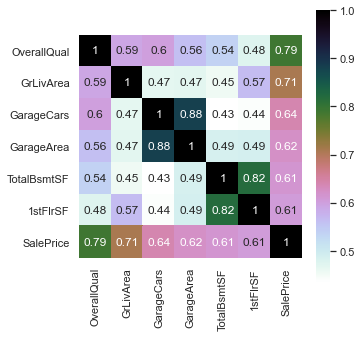

In [41]:
corr = df_train.corr()
plt.figure(figsize=(5,5))
sns.heatmap(corr, annot=True, cmap='cubehelix_r',square=True) 
plt.show()

# Linear Regression Model

In [42]:
from sklearn.model_selection import train_test_split
train, val = train_test_split(df_train, test_size=0.25)

In [43]:
#considering only the highly correlated features for training and validation
train_x = train.drop(['SalePrice'], axis = 1)
train_y = train['SalePrice']             # output of the training data

val_x = val.drop(['SalePrice'], axis = 1)
val_y = val['SalePrice']

In [44]:
print('Dimension of train_x dataframe:',train_x.shape)
print('Dimension of train_y dataframe:',train_y.shape)
print('Dimension of val_x dataframe:',val_x.shape)
print('Dimension of val_y dataframe:',val_y.shape)

Dimension of train_x dataframe: (1095, 6)
Dimension of train_y dataframe: (1095,)
Dimension of val_x dataframe: (365, 6)
Dimension of val_y dataframe: (365,)


In [45]:
from sklearn.linear_model import LinearRegression

ln_reg = LinearRegression()
ln_reg.fit(train_x, train_y)

LinearRegression()

In [46]:
df_pred = ln_reg.predict(val_x)

In [47]:
#MSE(Mean Square Error)
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(df_pred, val_y)
print('Mean Square Error of linear regression:',round(MSE,2))

Mean Square Error of linear regression: 1427594744.11


In [48]:
# Root Mean Sqaure Error
import math

RMSE = math.sqrt(mean_squared_error(df_pred, val_y))
print('Root Mean Square Error of linear regression:',round(RMSE,2))

Root Mean Square Error of linear regression: 37783.52


In [49]:
#Mean Absolute Error
from sklearn.metrics import mean_absolute_error

MAE = math.sqrt(mean_absolute_error(df_pred, val_y))
print('Mean Absolute Error of linear regression:',round(MAE,2))

Mean Absolute Error of linear regression: 158.79


In [50]:
#Mean Absolute Percentage Error
MAPE = np.mean(np.abs((df_pred - val_y) / val_y)) * 100
print('Mean Absolute Percentage Error of linear regression:',round(MAPE,2))

Mean Absolute Percentage Error of linear regression: 14.68


In [51]:
#R-squared Score
from sklearn.metrics import r2_score
r2 = r2_score(df_pred, val_y)
print('R_Squared Score:', round(r2,3))

R_Squared Score: 0.679


In [52]:
#Adjusted R_squared score
def adj_r2(x,y):
    N = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1 - (1-r2)*(N-1)/(N-p-1)
    return adjusted_r2

In [53]:
adjusted_r2 = adj_r2(val_x, val_y)
print('Adjusted R_Squared Score:', round(adjusted_r2,3))

Adjusted R_Squared Score: 0.674
